In [44]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import MinMaxScaler

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,
                  columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
X = df
y = pd.Series(cancer.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

X_tr, X_ts = StandardScaler().fit_transform(X_train), StandardScaler().fit_transform(X_test)

In [20]:
idx = 0
X.iloc[idx], y[idx]

(mean radius                  17.990000
 mean texture                 10.380000
 mean perimeter              122.800000
 mean area                  1001.000000
 mean smoothness               0.118400
 mean compactness              0.277600
 mean concavity                0.300100
 mean concave points           0.147100
 mean symmetry                 0.241900
 mean fractal dimension        0.078710
 radius error                  1.095000
 texture error                 0.905300
 perimeter error               8.589000
 area error                  153.400000
 smoothness error              0.006399
 compactness error             0.049040
 concavity error               0.053730
 concave points error          0.015870
 symmetry error                0.030030
 fractal dimension error       0.006193
 worst radius                 25.380000
 worst texture                17.330000
 worst perimeter             184.600000
 worst area                 2019.000000
 worst smoothness              0.162200


In [5]:
X.shape

(569, 30)

## Red Neuronal



In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [24]:
# establecemos el modelo donde estarán nuestras capas 
modelo = Sequential()

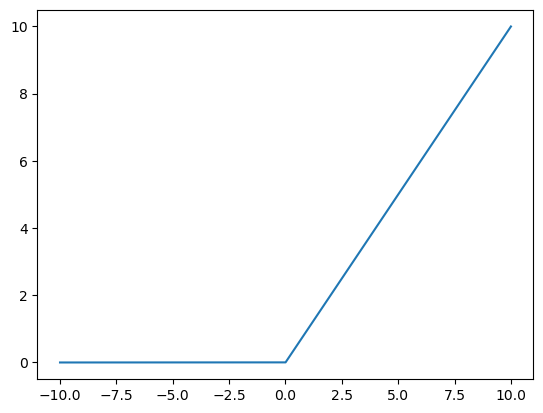

In [36]:
# Función de activación relu

relu = lambda x: max(0, x)

X_ejemplo = np.arange(-10,10, 1/1000)
Y_ejemplo = np.array([relu(x) for x in X_ejemplo])
plt.plot(X_ejemplo, Y_ejemplo)

In [39]:
# agregamos las capas a nuestro modelo desde la de entrada
# hasta la final
modelo.add(Dense(16, input_dim=30, activation='relu'))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                496       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 818
Trainable params: 818
Non-trainable 

In [42]:
# después de la construcción del modelo, tenemos que compilarlo 
modelo.compile(loss='binary_crossentropy', 
               optimizer='adam',
               metrics=['accuracy'])

In [54]:
# ya compilado, podemos entrenarlo 
H = modelo.fit(X_tr, y_train, 
               validation_data=(X_ts, y_test),
               epochs=15,
               batch_size=32,)

Epoch 1/15
15/15 [==============================] - 0s 30ms/step - loss: 0.0857 - accuracy: 0.9956 - val_loss: 0.1491 - val_accuracy: 0.9561
Epoch 2/15
15/15 [==============================] - 0s 10ms/step - loss: 0.0811 - accuracy: 0.9956 - val_loss: 0.1369 - val_accuracy: 0.9561
Epoch 3/15
15/15 [==============================] - 0s 9ms/step - loss: 0.0760 - accuracy: 0.9956 - val_loss: 0.1348 - val_accuracy: 0.9561
Epoch 4/15
15/15 [==============================] - 0s 9ms/step - loss: 0.0691 - accuracy: 0.9956 - val_loss: 0.1486 - val_accuracy: 0.9561
Epoch 5/15
15/15 [==============================] - 0s 11ms/step - loss: 0.0645 - accuracy: 0.9956 - val_loss: 0.1344 - val_accuracy: 0.9561
Epoch 6/15
15/15 [==============================] - 0s 9ms/step - loss: 0.0596 - accuracy: 0.9978 - val_loss: 0.1237 - val_accuracy: 0.9649
Epoch 7/15
15/15 [==============================] - 0s 11ms/step - loss: 0.0564 - accuracy: 0.9978 - val_loss: 0.1173 - val_accuracy: 0.9649
Epoch 8/15
15/15

In [55]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Loss / Val_loss')

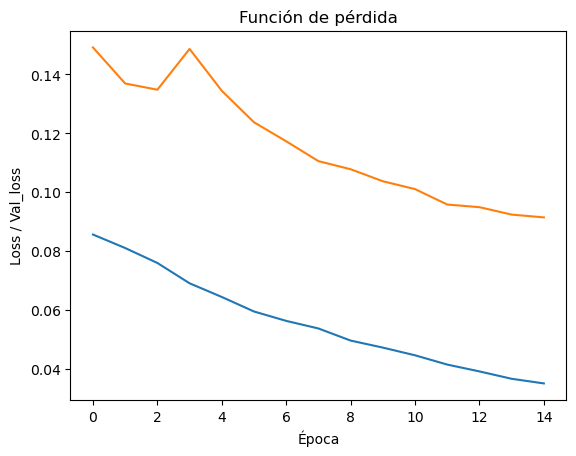

In [56]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])

plt.title('Función de pérdida')
plt.xlabel('Época')
plt.ylabel('Loss / Val_loss')

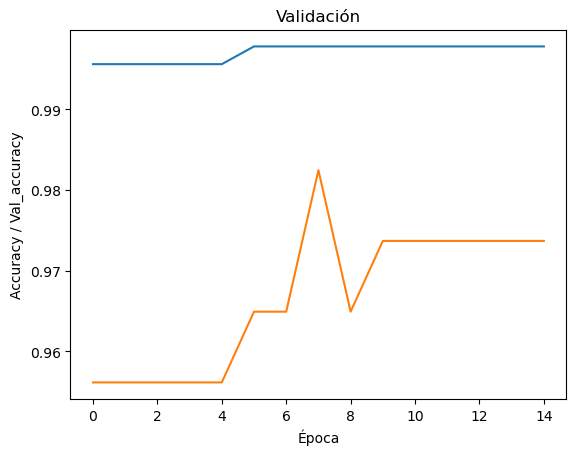

In [60]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])

plt.title('Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy / Val_accuracy');

In [70]:
vector_impulso = np.zeros([1,30])
vector_impulso[0,6] = 1

In [71]:
modelo.predict(vector_impulso)

1/1 [==============================] - 0s 16ms/step


array([[0.2600422]], dtype=float32)